In [15]:
import os
from docx import Document
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
docs = []
path = "docs"
for dir in os.listdir(path):
    document = Document(os.path.join(path, dir))
    data = ''
    for para in document.paragraphs:
        data += " " + para.text
    docs.append(data)


In [4]:
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
stop = stopwords.words('english')

def textCleaner(doc):
        doc = re.sub("[,.']", "", doc)
        doc = [token for token in doc.split(' ') if len(re.sub("[a-zA-Z]", "", token)) <= 0]
        doc = nlp(" ".join(doc))
        taglist = ['RB','RBR', 'RBS','JJR','JJ','JJS','NN','NNS','VB','VBG','VBP','VBN']
        poslist = ['ADJ','ADV','NOUN','VERB']
        doc = [token.lemma_.lower() for token in doc if token.tag_ in taglist and token.pos_ in poslist]
        doc = [token for token in doc if not token in stop and len(token)>2]
        return " ".join(doc)

In [8]:
clean_docs = []

for doc in docs:
    clean_docs.append(textCleaner(doc))

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_docs)

In [14]:
vectorizer.get_feature_names_out()

array(['abandon', 'ability', 'able', ..., 'yet', 'yoga', 'young'],
      dtype=object)

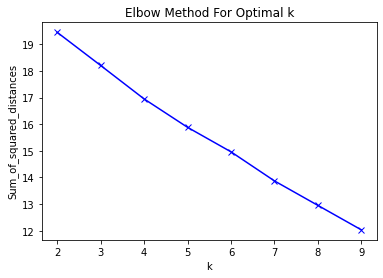

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [26]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
clust_id = [("doc"+str(i+1), lab) for i, lab in enumerate(labels)]
clust_id.sort(key=lambda x : x[1])
print(clust_id)

[('doc1', 0), ('doc10', 0), ('doc15', 0), ('doc17', 0), ('doc5', 1), ('doc11', 1), ('doc12', 1), ('doc19', 1), ('doc20', 2), ('doc21', 2), ('doc22', 2), ('doc23', 2), ('doc2', 3), ('doc3', 3), ('doc4', 3), ('doc13', 3), ('doc18', 3), ('doc6', 4), ('doc7', 4), ('doc8', 4), ('doc9', 4), ('doc14', 4), ('doc16', 4), ('doc24', 5)]


Cluster: 0


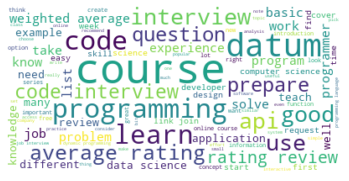

Cluster: 1


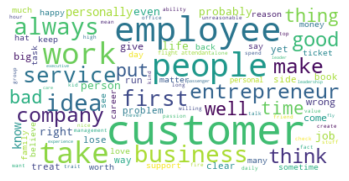

Cluster: 2


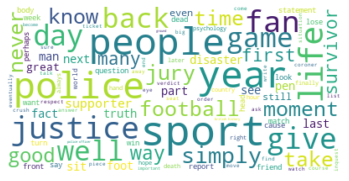

Cluster: 3


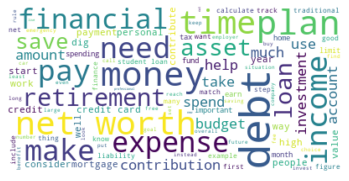

Cluster: 4


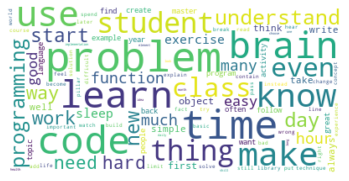

Cluster: 5


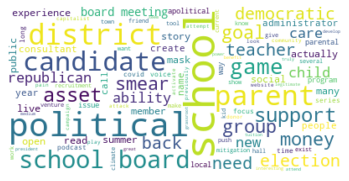

In [33]:
from wordcloud import WordCloud
import pandas as pd
result={'cluster':labels,'data':clean_docs}
result=pd.DataFrame(result)
for k in range(0,6):
   s=result[result.cluster==k]
   text=s['data'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()